In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [14]:
# loading data
data = pd.read_csv('cleaned_badminton_v2.csv')
data = data.drop(columns=['Unnamed: 0'])
# Change values of 'serving shot' column
data['HUMAN PLAYER POSITION (Z) metres'] = data['SERVING SHOT'].map({1: 1.6, 0: 2.6})
data = data.drop(columns=['SERVING SHOT'])

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OBSERVATION NUMBER,OBSERVATION GROUP NUMBER,OUT OF BOUNDS,HUMAN PLAYER POSITION (Z) metres
0,4,1,10,40,0,4.075543,1.000000,1.662912,1.0,1,0.0,1.6
1,4,1,10,40,0,4.152007,1.000000,1.724866,2.0,1,0.0,1.6
2,4,1,10,40,0,4.228906,1.000000,1.788139,3.0,1,0.0,1.6
3,4,1,10,40,0,4.302100,1.000000,1.845245,4.0,1,0.0,1.6
4,4,1,10,40,0,4.376877,1.000000,1.904128,5.0,1,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
168837,4,4,70,70,50,9.276323,10.288077,3.041504,36.0,1576,1.0,2.6
168838,4,4,70,70,50,9.326762,10.348188,2.466079,37.0,1576,1.0,2.6
168839,4,4,70,70,50,9.373273,10.403617,1.861569,38.0,1576,1.0,2.6
168840,4,4,70,70,50,9.414002,10.452156,1.230060,39.0,1576,1.0,2.6


In [62]:
from sklearn.preprocessing import StandardScaler
# Drop duplicates based on 'Observation Group Number', keeping only the first record
data_DT = data.copy()
# data_DT = data_DT.groupby('OBSERVATION GROUP NUMBER').head(10)

X_features_RF = data[['HUMAN PLAYER POSITION (X) metres', 
                        'HUMAN PLAYER POSITION (Y) metres', 
                        'HUMAN PLAYER POSITION (Z) metres', 
                        'SHUTTLECOCK POSITIION IN AIR(X ) metres', 
                        'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                        'SHUTTLECOCK POSITIION IN AIR(Z) metres',
                        'INITITAL VELOCITY OF SHUTTELCOCK(m/s)',
                        'OBSERVATION NUMBER']]

Y_features_RF = data[['INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                        'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)']]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
X_features_RF = scaler.fit_transform(X_features_RF)

# splitting data into X, Y train test, 80/20
X_train_RF, X_test_RF, Y_train_RF, Y_test_RF = train_test_split(X_features_RF, Y_features_RF, test_size=0.2, random_state=42)

In [53]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# # Create PolynomialFeatures object to generate polynomial terms
# degree = 3  # Adjust the degree as needed
# poly_features = PolynomialFeatures(degree=degree)

# # Transform the input features to include polynomial terms
# X_train_poly = poly_features.fit_transform(X_train_RF)
# X_test_poly = poly_features.transform(X_test_RF)

# # Create a Linear Regression models
# poly_reg = LinearRegression()

# # Fit the polynomial regression model to the training data
# poly_reg.fit(X_train_poly, Y_train_RF)

# # Predict the target variables for the test data
# Y_pred_poly = poly_reg.predict(X_test_poly)

# # Calculate the mean squared error (MSE)
# mse_poly = mean_squared_error(Y_test_RF, Y_pred_poly)
# print("Mean Squared Error (Polynomial Regression):", mse_poly)

Mean Squared Error (Polynomial Regression): 10.939849373921428


In [34]:
# from sklearn.linear_model import LinearRegression

# # Create a Linear Regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train_RF, Y_train_RF)

# # Predict the target variables for the test data
# Y_pred = model.predict(X_test_RF)

# # Evaluate the model's performance (you can use different evaluation metrics)
# # For example, you can calculate the mean squared error (MSE)
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(Y_test_RF, Y_pred)
# print("Mean Squared Error:", mse)


Mean Squared Error: 130.1229487901388


In [63]:
from sklearn.ensemble import RandomForestRegressor  # for regression tasks
model_randomForest = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)  # for regression

model_randomForest.fit(X_train_RF, Y_train_RF)
y_pred = model_randomForest.predict(X_test_RF)

mse = mean_squared_error(Y_test_RF, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5099277005874027


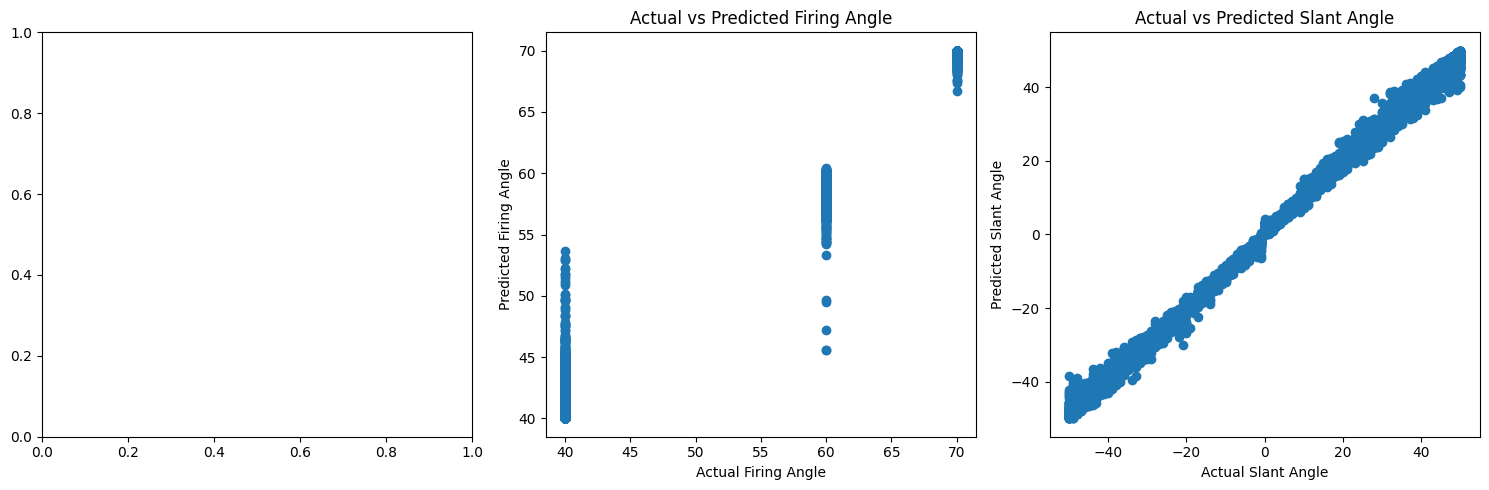

In [64]:
import matplotlib.pyplot as plt

# Get the actual and predicted values for all target variables
# y_actual_velocity = Y_test_RF['INITITAL VELOCITY OF SHUTTELCOCK(m/s)']
y_actual_angle = Y_test_RF['INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)']
y_actual_slant = Y_test_RF['SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)']

# y_pred_velocity = Y_pred_poly  # Assuming velocity is the first column in Y_pred_poly
y_pred_angle = y_pred[:, 0]  # Assuming angle is the second column in Y_pred_poly
y_pred_slant = y_pred[:, 1]  # Assuming slant is the third column in Y_pred_poly

# Create subplots for each target variable
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for initial velocity
# axs[0].scatter(y_actual_velocity, y_pred_velocity)
# axs[0].set_xlabel('Actual Velocity')
# axs[0].set_ylabel('Predicted Velocity')
# axs[0].set_title('Actual vs Predicted Velocity')

# # Plot for initial firing angle
axs[1].scatter(y_actual_angle, y_pred_angle)
axs[1].set_xlabel('Actual Firing Angle')
axs[1].set_ylabel('Predicted Firing Angle')
axs[1].set_title('Actual vs Predicted Firing Angle')

# # Plot for slant angle to sideline
axs[2].scatter(y_actual_slant, y_pred_slant)
axs[2].set_xlabel('Actual Slant Angle')
axs[2].set_ylabel('Predicted Slant Angle')
axs[2].set_title('Actual vs Predicted Slant Angle')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# # Plotting the MSE scores
# plt.plot(depths, mse_scores, marker='o')
# plt.xlabel('Depth')
# plt.ylabel('Mean Squared Error')
# plt.title('Mean Squared Error vs. Depth')
# plt.show()